# Employee Turnover Prediction

In [ ]:
# Dataset = "https://www.kaggle.com/datasets/akshayhedau/employee-turnover-analytics-dataset"

In [2]:
# Importing the libraries

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [3]:
# Reading in the data

df = pd.read_csv(r"/Users/shrutidua/Downloads/dataset.csv")


In [4]:
# Looking at the data

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [5]:
# Looking at the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
# Shape of dataset

df.shape

(14999, 10)

# Data Cleaning

In [7]:
# Looking for missing values

df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [8]:
# Checking for duplicates

df.duplicated(keep="first").sum()

3008

In [9]:
# Dropping the duplicate rows

df.drop_duplicates(inplace=True)

In [10]:
df.shape

(11991, 10)

In [11]:
df = df.rename(columns={'average_montly_hours': 'average_monthly_hours', "sales": "position", 
                        "promotion_last_5years":"promotion_last_5_years", "time_spend_company":"years_spent_at_company",
                       "number_project":"number_of_projects", "Work_accident":"work_accidents"})
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_spent_at_company,work_accidents,left,promotion_last_5_years,position,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Exploratory Data Analysis

<Axes: >

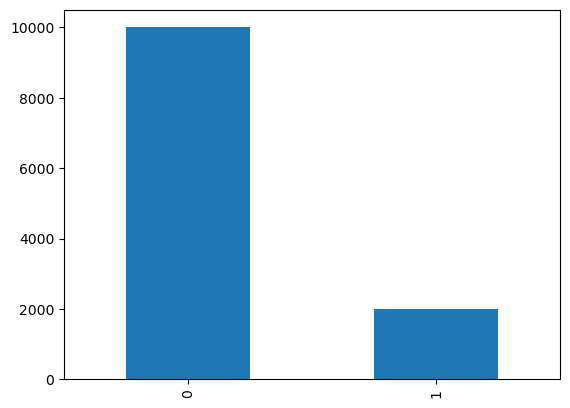

In [12]:
# Visualizing our target variable

df["left"].value_counts().plot(kind = "bar")

# Satisfaction level

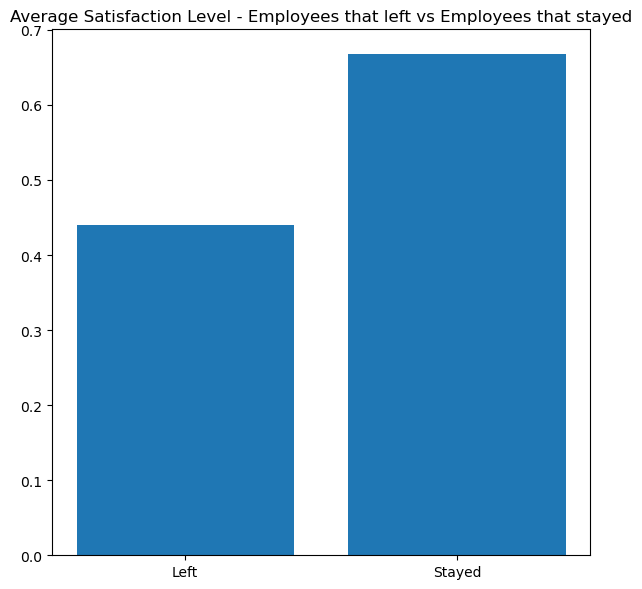

In [74]:
# Comparing average satisfaction level of employees who left vs who didn't

left = df[df["left"] == 1]
stayed = df[df["left"] == 0]

satisfaction_left = left["satisfaction_level"].mean()
satisfaction_stayed = stayed["satisfaction_level"].mean()

categories = ['Left', 'Stayed']
satisfaction_hours = [satisfaction_left, satisfaction_stayed]

plt.figure(figsize=(6, 6))
plt.bar(categories, satisfaction_hours)
plt.title("Average Satisfaction Level - Employees that left vs Employees that stayed")
plt.tight_layout()
plt.show()

# Average monthly hours

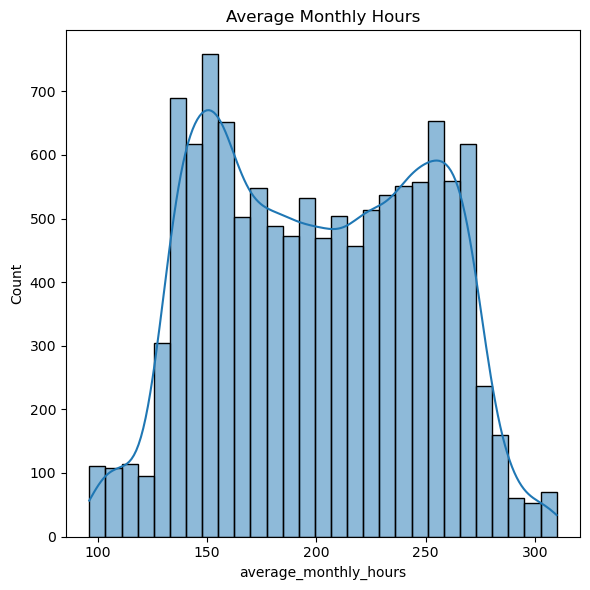

In [75]:
# Looking at the average monthly hours of all employees

bins = bins = len(df["average_monthly_hours"].unique())

plt.figure(figsize=(6, 6))
sns.histplot(data = df, x = df["average_monthly_hours"], kde = True)
plt.title("Average Monthly Hours")
plt.tight_layout()
plt.show()

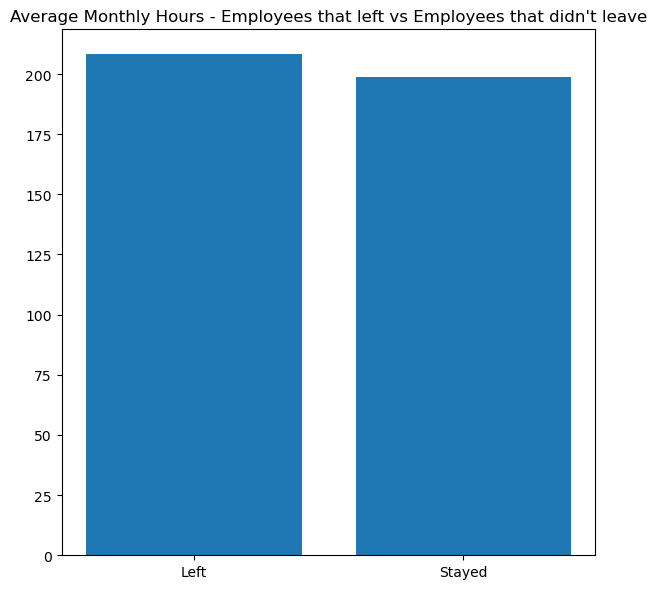

In [76]:
# Comparing average monthly hours of employees who left vs who didn't

average_hours_left = left["average_monthly_hours"].mean()
average_hours_stayed = stayed["average_monthly_hours"].mean()

categories = ['Left', 'Stayed']
average_hours = [average_hours_left, average_hours_stayed]

plt.figure(figsize=(6, 6))
plt.bar(categories, average_hours)
plt.title("Average Monthly Hours - Employees that left vs Employees that didn't leave")
plt.tight_layout()
plt.show()

# Number of projects

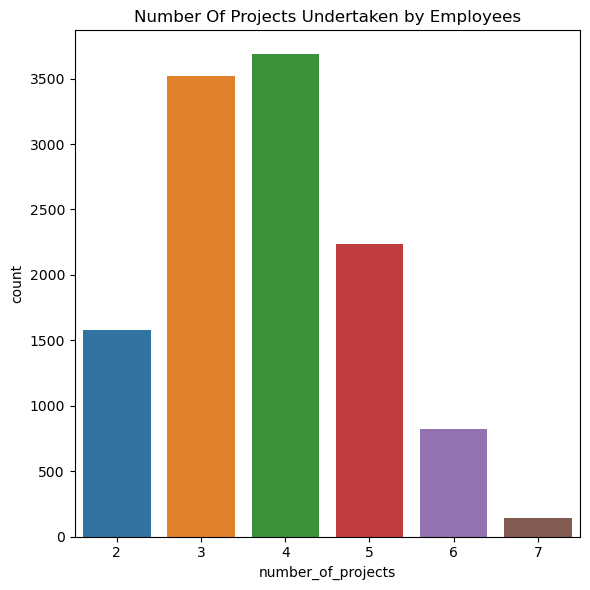

In [77]:
# Number Of Projects Undertaken by all Employees

plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="number_of_projects")
plt.title("Number Of Projects Undertaken by Employees")
plt.tight_layout()
plt.show()

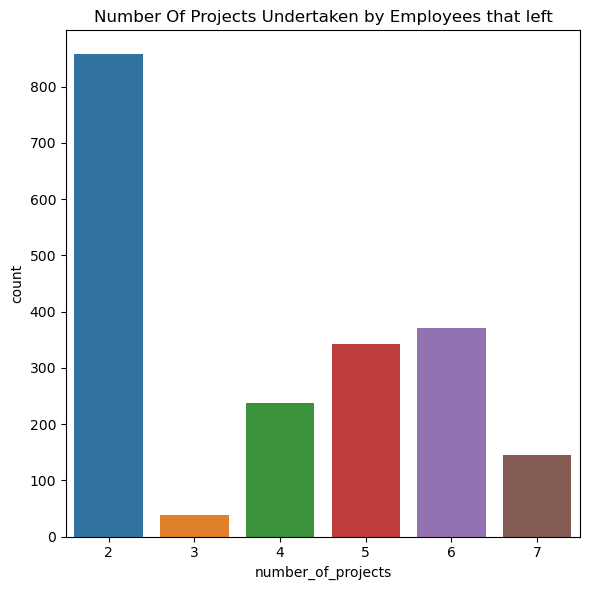

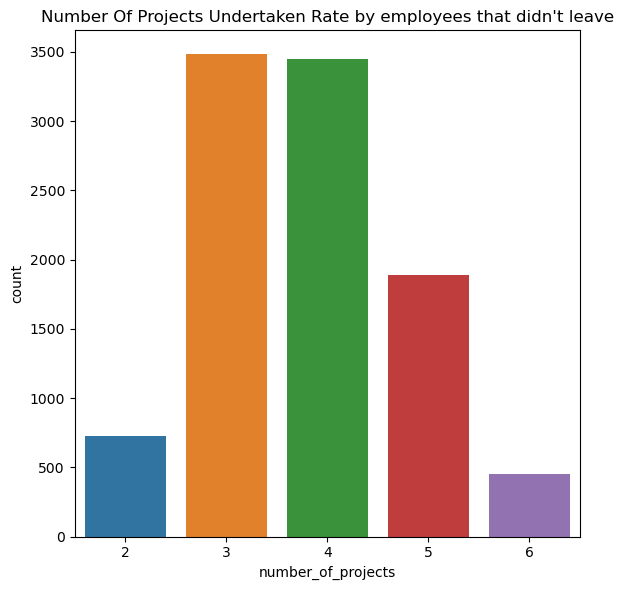

In [78]:
# Number Of Projects Undertaken by Employees divided by whether or not they left the company

plt.figure(figsize=(6, 6))
sns.countplot(data=left, x="number_of_projects")
plt.title("Number Of Projects Undertaken by Employees that left")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(data=stayed, x="number_of_projects")
plt.title("Number Of Projects Undertaken Rate by employees that didn't leave")
plt.tight_layout()
plt.show()

# Promotion in last 5 years

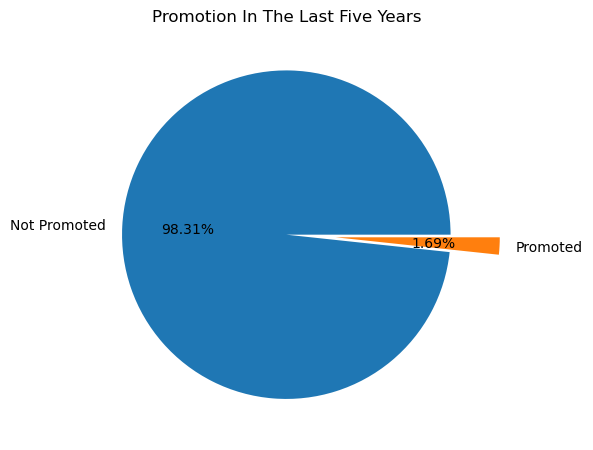

In [79]:
# Promotions given to employees in the last five years

labels = df["promotion_last_5_years"].value_counts().index.tolist()
labels = ["Promoted" if i == 1 else "Not Promoted" for i in labels]

plt.figure(figsize=(6, 6))
plt.pie(x = df["promotion_last_5_years"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion In The Last Five Years")
plt.tight_layout()
plt.show()

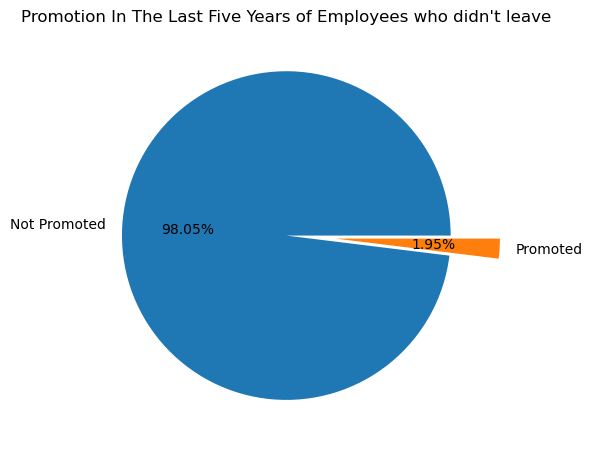

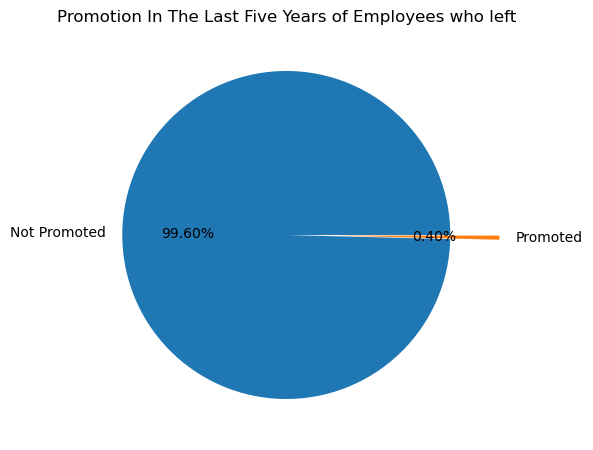

In [80]:
# Comparing promotions between those who stayed and left

# Those who stayed
plt.figure(figsize=(6, 6))
plt.pie(x = stayed["promotion_last_5_years"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion In The Last Five Years of Employees who didn't leave")
plt.tight_layout()
plt.show()

# Those who left
plt.figure(figsize=(6, 6))
plt.pie(x = left["promotion_last_5_years"].value_counts(), labels=labels, autopct="%1.2f%%", explode=[0, 0.3])
plt.title("Promotion In The Last Five Years of Employees who left")
plt.tight_layout()
plt.show()

# Salary level

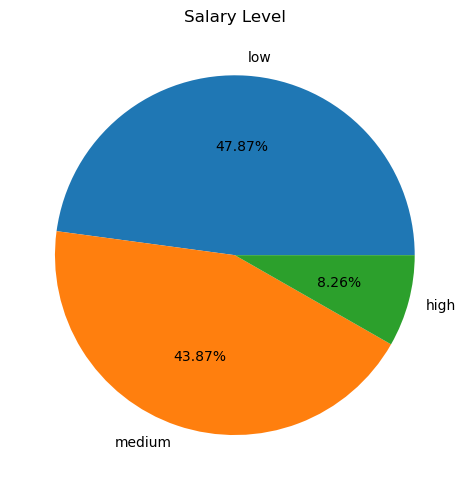

In [81]:
# Salary distribution of employees

labels = df["salary"].value_counts().index.tolist()

plt.figure(figsize=(5, 5))
plt.pie(x = df["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Level")
plt.tight_layout()
plt.show()

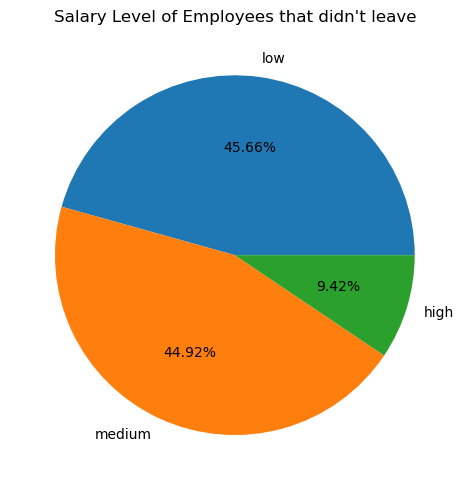

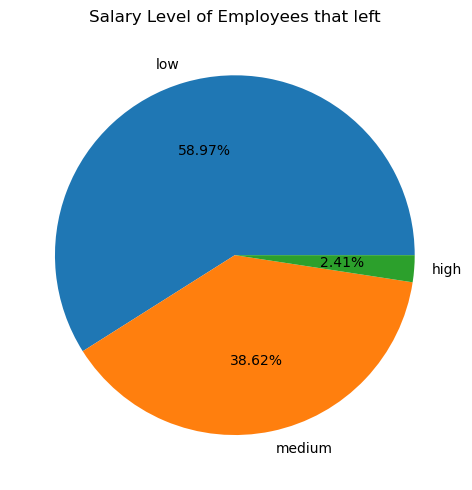

In [82]:
# Salary distribution of employees divided by the employees who left and who didn't

labels = df["salary"].value_counts().index.tolist()

# Those who stayed
plt.figure(figsize=(5, 5))
plt.pie(x = stayed["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Level of Employees that didn't leave")
plt.tight_layout()
plt.show()

# Those who left
plt.figure(figsize=(5, 5))
plt.pie(x = left["salary"].value_counts(), labels=labels, autopct="%1.2f%%")
plt.title("Salary Level of Employees that left")
plt.tight_layout()
plt.show()

# Employee Position

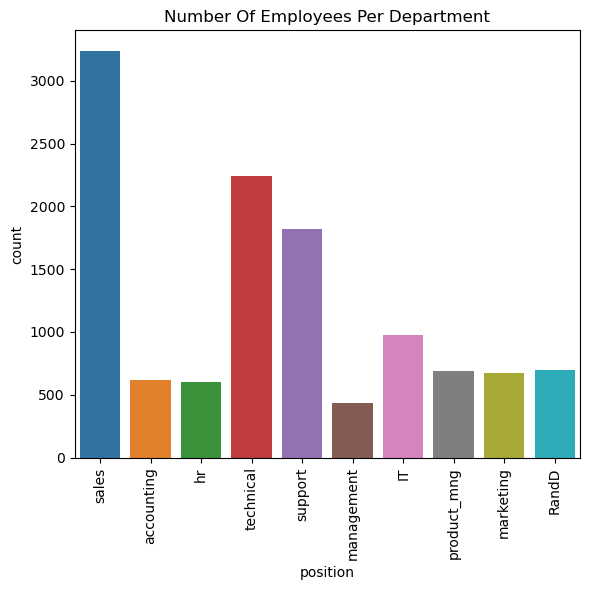

In [83]:
# Number of employees in each department

plt.figure(figsize=(6, 6))
sns.countplot(x = "position", data=df)
plt.title("Number Of Employees Per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

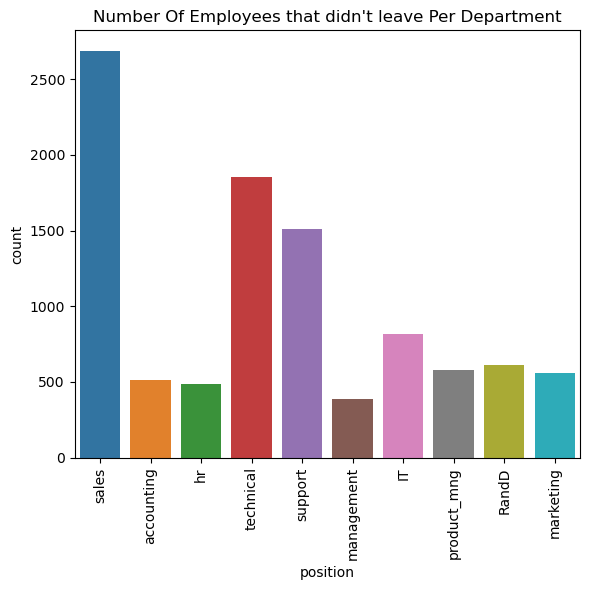

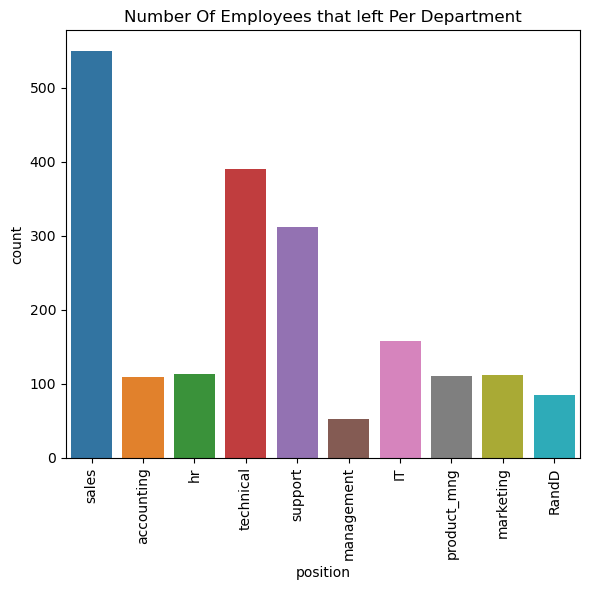

In [84]:
# Looking at the department division of those who left and those who didn't

# Those who stayed
plt.figure(figsize=(6, 6))
sns.countplot(x = "position", data=stayed)
plt.title("Number Of Employees that didn't leave Per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Those who left
plt.figure(figsize=(6, 6))
sns.countplot(x = "position", data=left)
plt.title("Number Of Employees that left Per Department")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Data pre-processing

In [85]:
# Categorial encoding

columns = ["position", "salary"]
new_columns = pd.get_dummies(df[columns], prefix="type")

In [86]:
new_columns.head()

,type_IT,type_RandD,type_accounting,type_hr,type_management,type_marketing,type_product_mng,type_sales,type_support,type_technical,type_high,type_low,type_medium
0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,0,1,0


In [87]:
df = df.join(new_columns)
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_spent_at_company,work_accidents,left,promotion_last_5_years,position,salary,type_IT,type_RandD,type_accounting,type_hr,type_management,type_marketing,type_product_mng,type_sales,type_support,type_technical,type_high,type_low,type_medium
0,0.38,0.53,2,157,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,low,0,0,0,0,0,0,0,1,0,0,0,1,0


In [88]:
# Dropping the columns we have encoded

df.drop(["position", "salary"], inplace=True, axis= 1)
df.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_spent_at_company,work_accidents,left,promotion_last_5_years,type_IT,type_RandD,type_accounting,type_hr,type_management,type_marketing,type_product_mng,type_sales,type_support,type_technical,type_high,type_low,type_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# Seperating data into predictors and target values

In [89]:
X = df.drop("left", axis=1)
y = df["left"]

In [90]:
X.head()

,satisfaction_level,last_evaluation,number_of_projects,average_monthly_hours,years_spent_at_company,work_accidents,promotion_last_5_years,type_IT,type_RandD,type_accounting,type_hr,type_management,type_marketing,type_product_mng,type_sales,type_support,type_technical,type_high,type_low,type_medium
0,0.38,0.53,2,157,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


# Splitting data into training and test data

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [92]:
X_train.shape

(9592, 20)

In [93]:
X_test.shape

(2399, 20)

# Logistic Regression

# Training the model

In [94]:
# Creating the model
logistic = LogisticRegression(max_iter=2000)

# Training the model on the training data
logistic.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [95]:
# Predict the target values of the test data using the model

y_pred_lr = logistic.predict(X_test)

# Evaluation of the model

In [96]:
# Accuracy, precision, recall, and f1 score

accuracy = accuracy_score(y_test, y_pred_lr)
precision = precision_score(y_test, y_pred_lr)
recall = recall_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.8170070862859525
Precision: 0.46808510638297873
Recall: 0.20608899297423888
F1 score: 0.2861788617886179


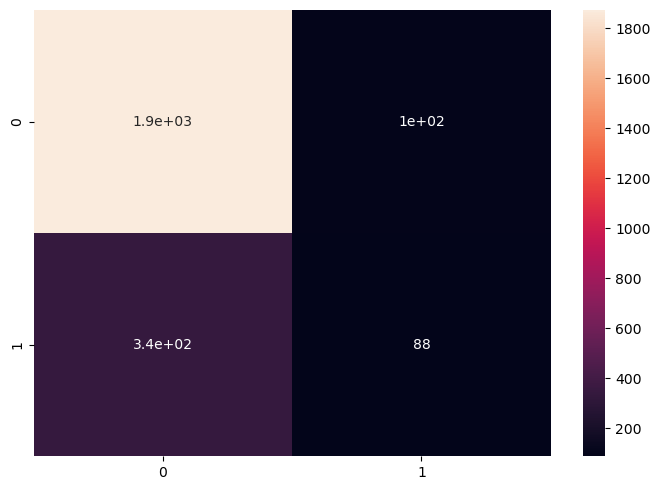

In [97]:
# Confusion matrix using heatmap

cm = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

In [98]:
# As we can see, the Logistic Regression model is giving a large number of false positives. 
# Therefore, applying more models to get the best outcome is important.

# Random forrest 

# Training the model

In [99]:
# Creating the model
randf = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)

# Training the model on the training data
randf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', random_state=0)

In [100]:
# Predict the target values of the test data using the model

y_pred_rf = randf.predict(X_test)

# Evaluation of the model

In [52]:
# Accuracy, precision, recall, and f1 score

accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9829095456440183
Precision: 0.9915254237288136
Recall: 0.9023136246786633
F1 score: 0.9448183041722745


In [53]:
# Classification report

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      2010
           1       0.99      0.90      0.94       389

    accuracy                           0.98      2399
   macro avg       0.99      0.95      0.97      2399
weighted avg       0.98      0.98      0.98      2399



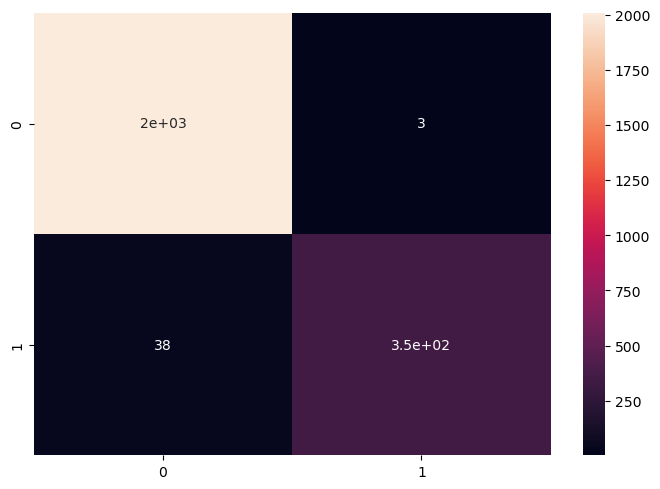

In [54]:
# Confusion matrix using heatmap

cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()

# Xgboost

In [55]:
# Creating the model
xgb = XGBClassifier()

# Training the model on the training data
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [56]:
# Predict the target values of the test data using the model

y_pred_xg = xgb.predict(X_test)

# Evaluation of the model

In [57]:
# Accuracy, precision, recall, and f1 score

accuracy = accuracy_score(y_test, y_pred_xg)
precision = precision_score(y_test, y_pred_xg)
recall = recall_score(y_test, y_pred_xg)
f1 = f1_score(y_test, y_pred_xg)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

Accuracy: 0.9837432263443101
Precision: 0.972972972972973
Recall: 0.9254498714652957
F1 score: 0.9486166007905139


In [58]:
# Classification report

print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2010
           1       0.97      0.93      0.95       389

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399



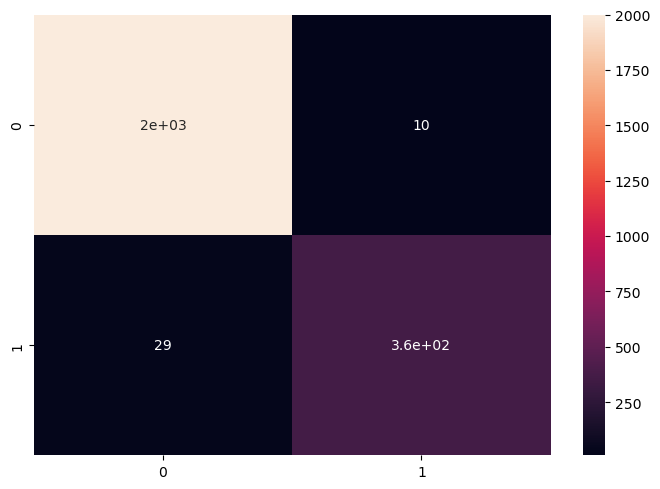

In [59]:
# Confusion matrix using heatmap

cm = confusion_matrix(y_test, y_pred_xg)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True)
plt.tight_layout()
plt.show()